# Logistic regression

In [1]:
from util.functions import impute_and_train
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 10000)

results = impute_and_train(model)

    

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 

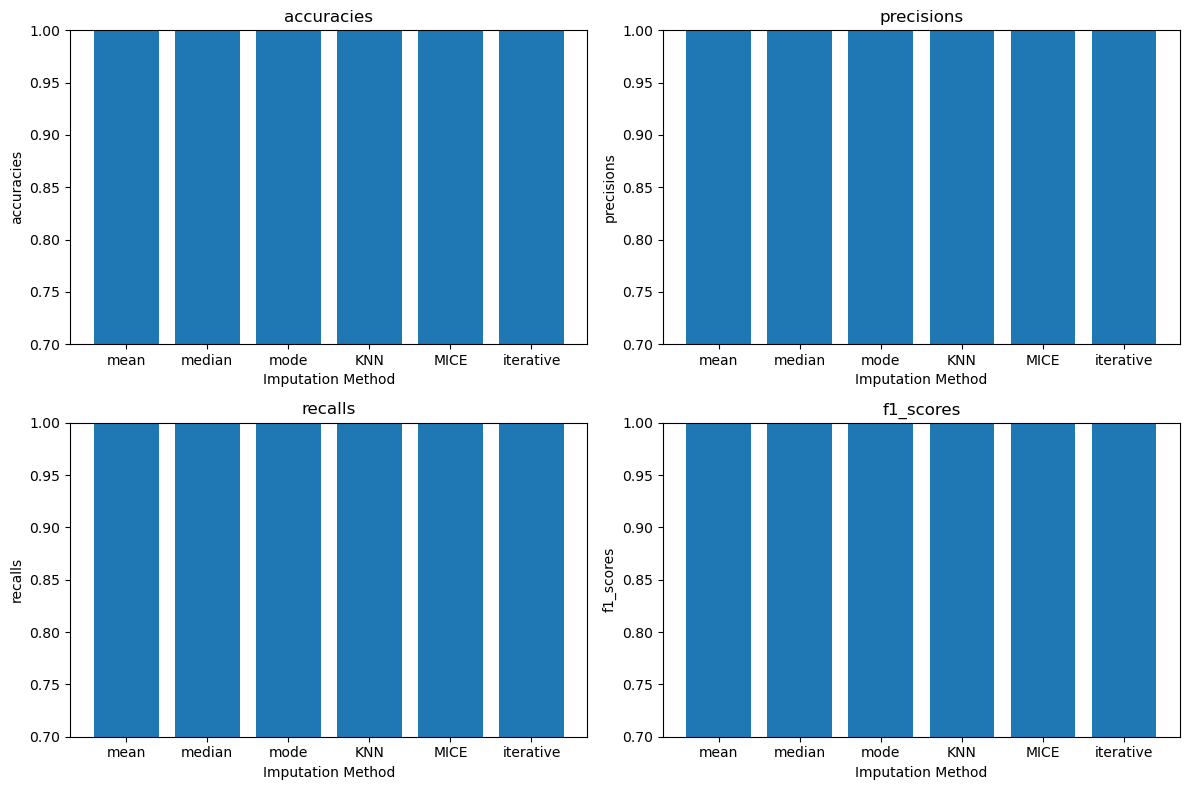

In [2]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


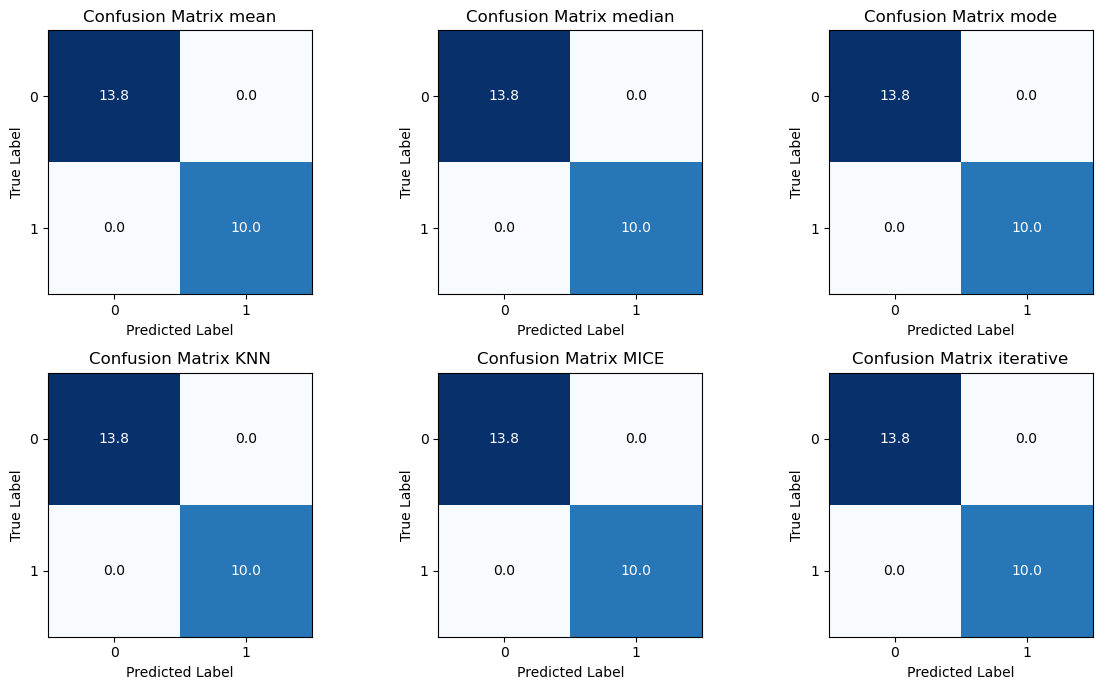

In [3]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

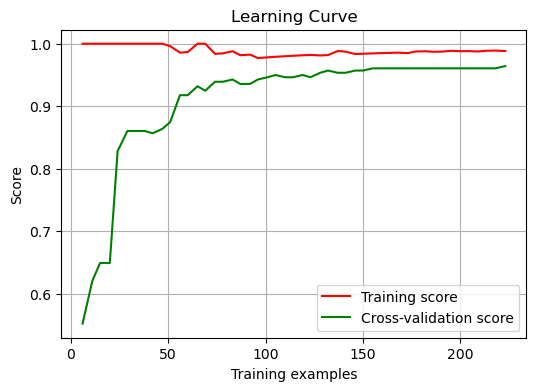

In [4]:
from util.functions import plot_learning_curve
plot_learning_curve(results['learning_curve'])

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from util.functions import plot_feature_importances

dataframes = {
    'mean': pd.read_csv('imputed/mean.csv'),
    'median': pd.read_csv('imputed/median.csv'),
    'mode': pd.read_csv('imputed/mode.csv'),
    'KNN': pd.read_csv('imputed/KNN.csv'),
    'MICE': pd.read_csv('imputed/MICE.csv'),
    'iterative': pd.read_csv('imputed/iterative.csv'),
}

# plot all feature importances as subplots
feature_importances = {}
for (name, model) in results['models'].items():
    
    coefficients = model.coef_[0]

    # Take the absolute values
    abs_coefficients = abs(coefficients)

    # Normalize the absolute coefficients
    scaler = MinMaxScaler()
    normalized_coefficients = scaler.fit_transform(abs_coefficients.reshape(-1, 1)).flatten()

    feature_importances[name] = pd.DataFrame({'Importance': normalized_coefficients}, index=dataframes[name].drop(columns=['class']).columns)

plot_feature_importances(feature_importances)

FileNotFoundError: [Errno 2] No such file or directory: 'imputed/mean.csv'